In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob,sys,socket,fileinput
import os.path
import matplotlib.pyplot as plt
from tikzplotlib import save as savetikz

In [5]:
# Folder es la carpeta en donde estan los .txt que se sacan del monitor del arduino

folder = "../calibra22nov/"
files = np.sort(glob.glob(folder+'*'))

In [6]:
# en calibrationData va el nombre del archivo que 
calibrationfile = "CalibrationData.txt"
calibrationData=open(calibrationfile,"w")
calibrationData.write('txt,Media_Lift,Media_Drag,STD Lift,STD Drag\n');

In [13]:
datos = pd.read_csv(k, sep=",", header=None,skiprows=5)
datos.columns = ["Lift", "Drag", "Time"]
datos = datos.astype(float)
datos=datos

In [14]:
datos

,Lift,Drag,Time
0,210.43,1292.05,1546.0
1,210.10,1292.31,1557.0
2,210.55,1292.74,1569.0
3,210.81,1292.83,1581.0
4,210.10,1292.92,1593.0
...,...,...,...
355,210.50,1292.67,5718.0
356,210.35,1292.71,5729.0
357,210.00,1292.77,5741.0
358,210.59,1292.68,5752.0


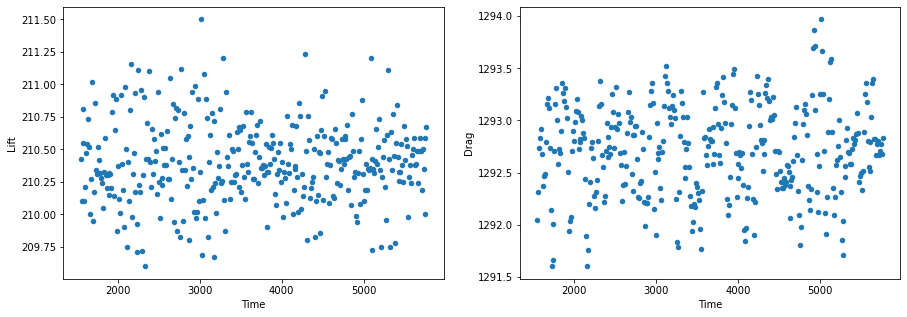

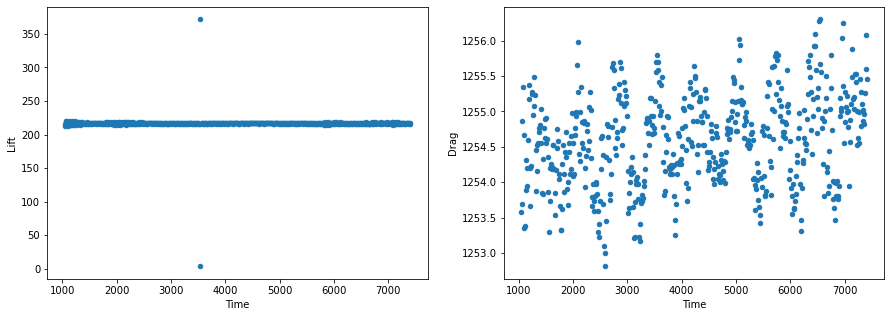

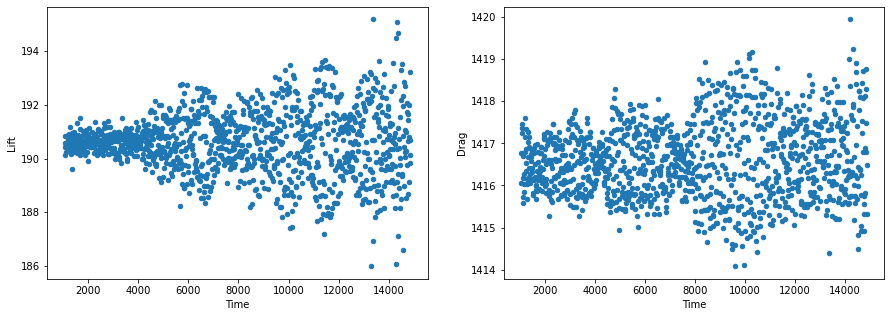

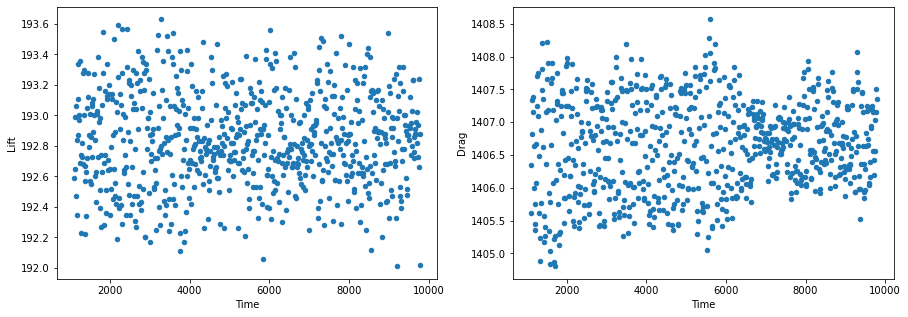

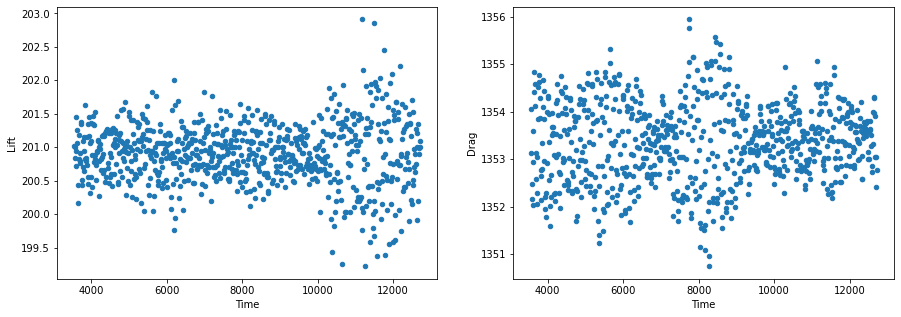

In [16]:
for k in files:
    datos = pd.read_csv(k, sep=",", header=None,skiprows=5)
    datos = datos
    datos.columns = ["Lift", "Drag", "Time"]
    datos = datos.astype(float)
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    df=datos
    

    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    

    
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
      
    
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    

    
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, 5)
    df.plot.scatter(ax=axes[0],x="Time", y="Lift")
    df.plot.scatter(ax=axes[1],x="Time", y="Drag")
    fig.savefig(k+".png", dpi=100)
    tag=k.split('/')[1]
    tag2=tag[9:]
    tag3=tag2[:-4]
    print(tag3)
   
    # Las lineas vienen como #.txt,mediaL,mediaD,stdL,stdD
    calibrationData.write(tag3+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag)+"\n")
calibrationData.close()    

In [17]:
A = pd.read_csv(calibrationfile)

In [18]:
files

array(['../calibra22nov/100gr', '../calibra22nov/130gr',
       '../calibra22nov/50gr', '../calibra22nov/60gr',
       '../calibra22nov/80gr'], dtype='<U21')

In [19]:
valores_masa_drag = pd.Series([100,130,50,60,80])

A = A.assign(Peso_Drag=valores_masa_drag.values)
A["Error Masa"]=0.1

Text(0.5, 0, 'peso')

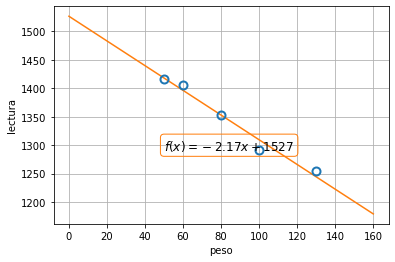

In [20]:
fig,ax = plt.subplots()

polyline = np.linspace(0, 160, num=160)

PoliDrag = np.polyfit(A["Peso_Drag"],A["Media_Drag"],1)

ajuste_drag = np.poly1d(PoliDrag)

ax.errorbar(A["Peso_Drag"],A["Media_Drag"],yerr=A['STD Drag'],xerr=A['Error Masa'],markersize=8,fillstyle='none',marker='o',linestyle='',markeredgewidth=2)
lin, = ax.plot(polyline, ajuste_drag(polyline))
color1 = lin.get_color()
ax.grid()
nmid = int(len(A)/2)
ax.text(A["Peso_Drag"][nmid],A["Media_Drag"][nmid-2],f'$f(x)={PoliDrag[0]:.2f}x+{PoliDrag[1]:.0f}$',fontsize=12,bbox=dict(facecolor='none', edgecolor=color1, boxstyle='round'));
ax.set_ylabel('lectura')
ax.set_xlabel('peso')



In [84]:
PoliDrag

array([ -1410.73554084, 974001.2803532 ])

In [117]:
# Folder es la carpeta en donde estan los .txt que se sacan del monitor del arduino

folder = "Lift/"
files = np.sort(glob.glob(folder+'*.txt'))

In [118]:
# en calibrationData va el nombre del archivo que 
calibrationfile = "CalibrationData_lift.txt"
calibrationData=open(calibrationfile,"w")
calibrationData.write('txt,Media_Lift,Media_Drag,STD Lift,STD Drag\n');

In [116]:
calibrationData.close()

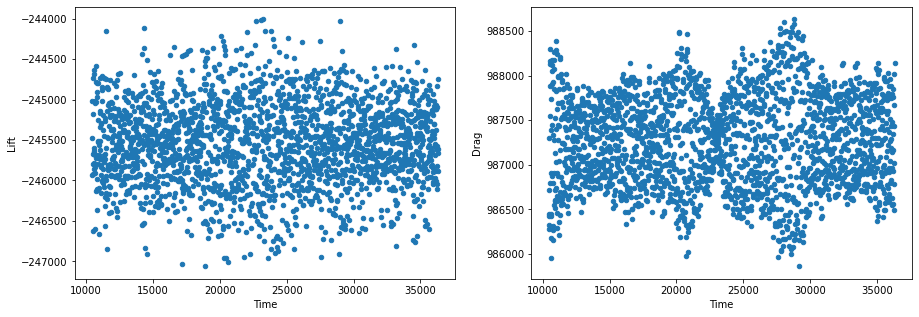

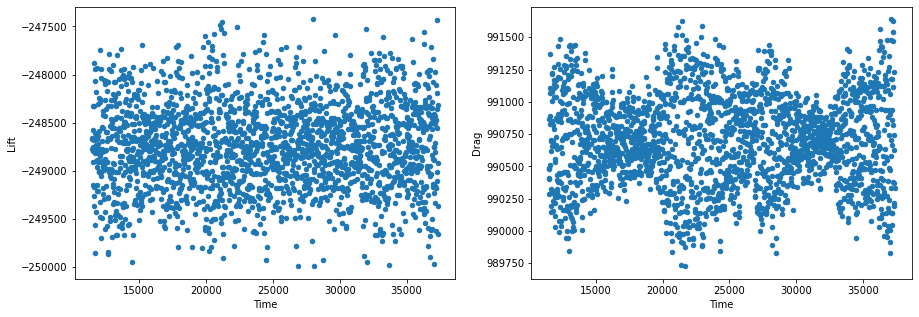

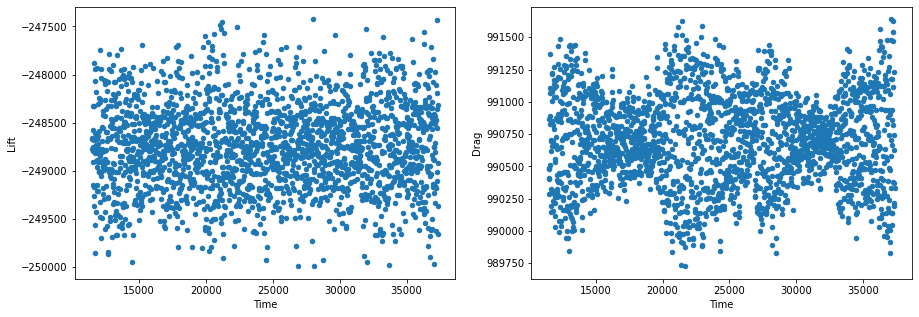

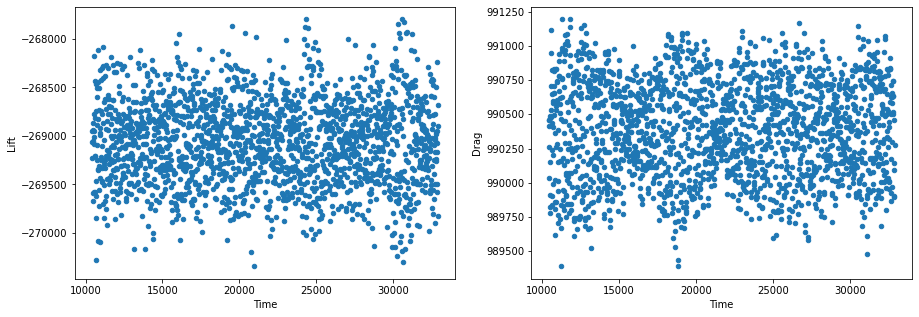

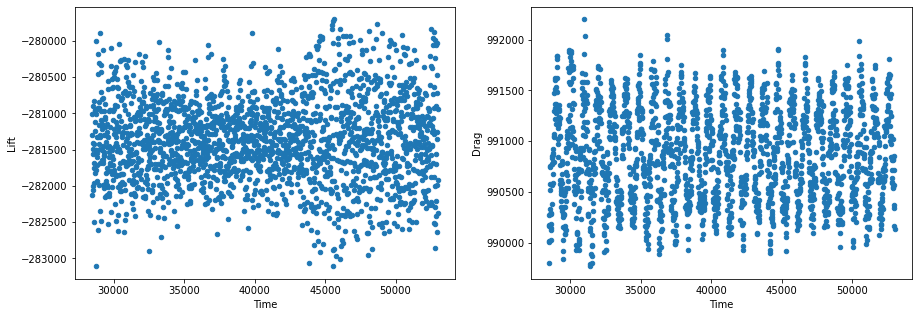

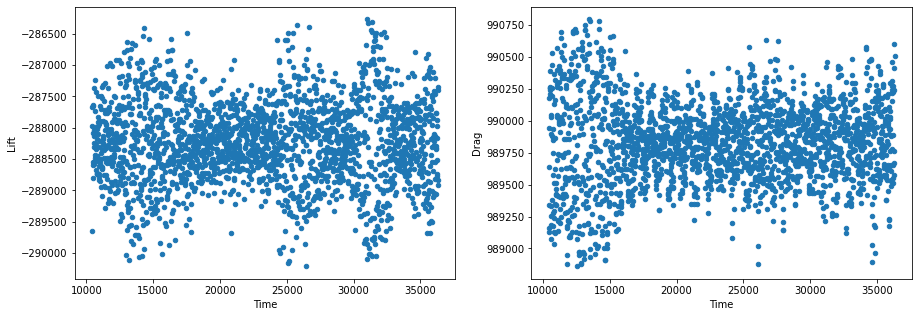

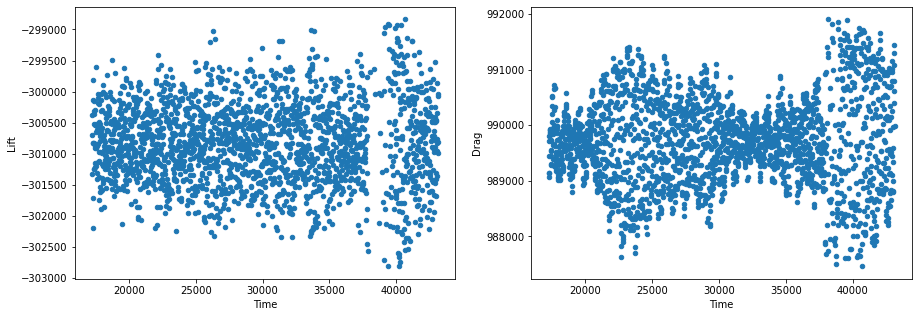

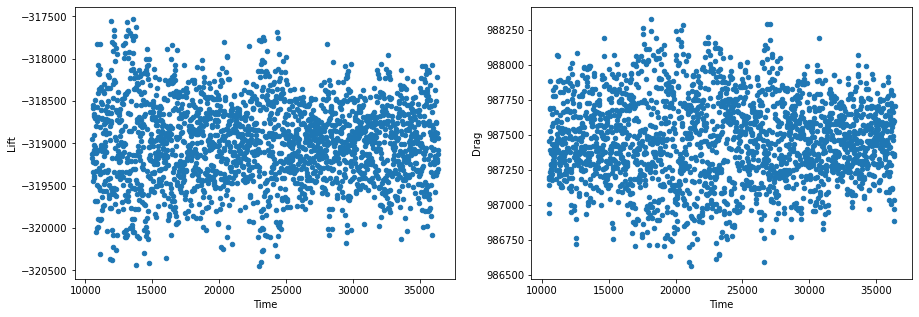

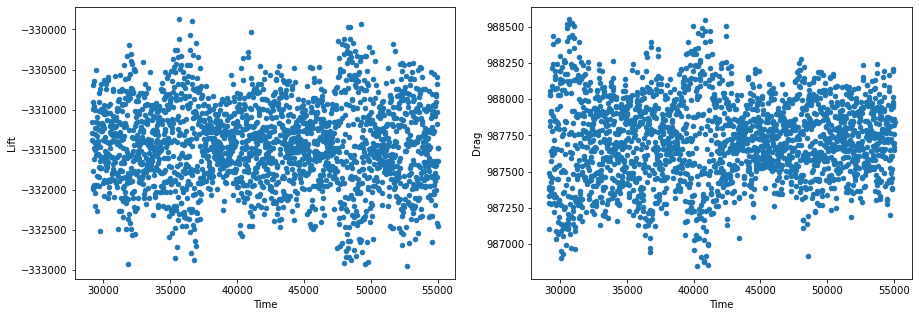

In [119]:
for k in files:
    datos = pd.read_csv(k, sep=",", header=None,skiprows=5)
    datos = datos[:-100]
    datos.columns = ["Lift", "Drag", "Time"]
    datos = datos.astype(float)
    datos=datos[800:3000]
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    df=datos
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+3*stdLift):
            df["Lift"][i]=np.nan
        if df["Lift"][i]<(mediaLift-3*stdLift):
            df["Lift"][i]=np.nan
        if df["Drag"][i]>(mediaDrag+3*stdDrag):
            df["Drag"][i]=np.nan
        if df["Drag"][i]<(mediaDrag-3*stdDrag):
            df["Drag"][i]=np.nan

    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+3*stdLift):
            df["Lift"][i]=np.nan
        if df["Lift"][i]<(mediaLift-3*stdLift):
            df["Lift"][i]=np.nan
        if df["Drag"][i]>(mediaDrag+3*stdDrag):
            df["Drag"][i]=np.nan
        if df["Drag"][i]<(mediaDrag-3*stdDrag):
            df["Drag"][i]=np.nan
    
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+3*stdLift):
            df["Lift"][i]=(df["Lift"][i+1]+df["Lift"][i-1])*0.5
        if df["Lift"][i]<(mediaLift-3*stdLift):
            df["Lift"][i]=(df["Lift"][i+1]+df["Lift"][i-1])*0.5
        if df["Drag"][i]>(mediaDrag+3*stdDrag):
            df["Drag"][i]=(df["Drag"][i+1]+df["Drag"][i-1])*0.5
        if df["Drag"][i]<(mediaDrag-3*stdDrag):
            df["Drag"][i]=(df["Drag"][i+1]+df["Drag"][i-1])*0.5    
    
    mediaLift=int(datos["Lift"].mean())
    stdLift=int(datos["Lift"].std())
    mediaDrag=int(datos["Drag"].mean())
    stdDrag=int(datos["Drag"].std())
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+3*stdLift):
            df["Lift"][i]=(df["Lift"][i+1]+df["Lift"][i-1])*0.5
        if df["Lift"][i]<(mediaLift-3*stdLift):
            df["Lift"][i]=(df["Lift"][i+1]+df["Lift"][i-1])*0.5
        if df["Drag"][i]>(mediaDrag+3*stdDrag):
            df["Drag"][i]=(df["Drag"][i+1]+df["Drag"][i-1])*0.5
        if df["Drag"][i]<(mediaDrag-3*stdDrag):
            df["Drag"][i]=(df["Drag"][i+1]+df["Drag"][i-1])*0.5  
    
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, 5)
    df.plot.scatter(ax=axes[0],x="Time", y="Lift")
    df.plot.scatter(ax=axes[1],x="Time", y="Drag")
    fig.savefig(k+".png", dpi=100)
    tag=k.split('/')[1]
    tag2=tag[9:]
    tag3=tag2[:-4]
    print(tag3)
   
    # Las lineas vienen como #.txt,mediaL,mediaD,stdL,stdD
    calibrationData.write(tag3+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag)+"\n")
calibrationData.close()

In [115]:
k
#pd.read_csv(k, sep=",", header=None,skiprows=5)

'Lift/000.00.txt'

In [131]:
A = pd.read_csv(calibrationfile)

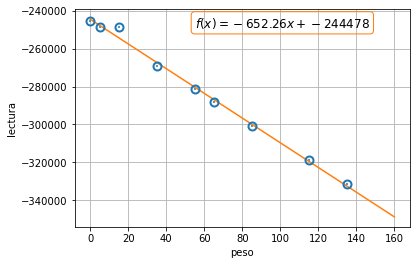

In [137]:
valores_masa_lift = np.array([0,5,15,35,55,65,85,115,135])


A = A.assign(Peso_Lift=valores_masa_lift)
A["Error Masa"]=0.1

#LiftCal["Peso_lift"]=valores_masa_lift
#LiftCal["Error Masa"]=0.1

PoliLift = np.polyfit(A["Peso_Lift"],A["Media_Lift"],1)

ajuste_lift = np.poly1d(PoliLift)

fig,ax = plt.subplots()

polyline = np.linspace(0, 160, num=160)


ax.errorbar(A["Peso_Lift"],A["Media_Lift"],yerr=A['STD Lift'],xerr=A['Error Masa'],markersize=8,fillstyle='none',marker='o',linestyle='',markeredgewidth=2)
lin, = ax.plot(polyline, ajuste_lift(polyline))
color1 = lin.get_color()
ax.grid()
nmid = int(len(A)/2)
ax.text(A["Peso_Lift"][nmid],A["Media_Lift"][nmid-2],f'$f(x)={PoliLift[0]:.2f}x+{PoliLift[1]:.0f}$',fontsize=12,bbox=dict(facecolor='none', edgecolor=color1, boxstyle='round'));
ax.set_ylabel('lectura')
ax.set_xlabel('peso');
savetikz('ajuste_lift.tikz')
